In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [3]:
df = pd.read_csv("sobcov\MainSoB.csv")
df = df.drop(df.columns[0], axis=1)

In [4]:
df.head()

,Year,State.Code,State.Abbr,County.Code,County.Name,Commodity.Code,Commodity.Name,Insurance.Plan.Code,Insurance.Plan.Abbr,Coverage.Category,...,Net.Planted.Quantity,Net.Endorsed.Acres,Liability,Total.Premium,Subsidy,State/Provate.Subsidy,Additional.Subsidy,EFA.Premium.Discount,Indemnity.Amount,Loss.Ratio
0,1989,1,AL,0,All Other Counties,9999,All Other Crops,90,APH,E,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0.00
1,1989,1,AL,999,All Other Counties,9999,All Other Crops,90,APH,E,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0.00
2,1989,1,AL,999,All Other Counties,9999,All Other Crops,90,APH,E,...,1147.0,0,206577.0,13216.0,3988.0,0,0,0,36662,2.77
3,1989,1,AL,999,All Other Counties,9999,All Other Crops,90,APH,E,...,413.0,0,95934.0,8352.0,2473.0,0,0,0,3720,0.45
4,1989,1,AL,999,All Other Counties,9999,All Other Crops,90,APH,E,...,180.0,0,7207.0,1892.0,319.0,0,0,0,4983,2.63


In [5]:
df.head()
Territories_To_Drop = [2, 11, 15, 72, 78]
df = df[~df['State.Code'].isin(Territories_To_Drop)]

In [6]:
#keep only the commodities we look at
comms_list=[41,11,81,51,88,91,21]
df = df[df['Commodity.Code'].isin(comms_list)]
df.head()

,Year,State.Code,State.Abbr,County.Code,County.Name,Commodity.Code,Commodity.Name,Insurance.Plan.Code,Insurance.Plan.Abbr,Coverage.Category,...,Net.Planted.Quantity,Net.Endorsed.Acres,Liability,Total.Premium,Subsidy,State/Provate.Subsidy,Additional.Subsidy,EFA.Premium.Discount,Indemnity.Amount,Loss.Ratio
12,1989,1,AL,1,Autauga,41,CORN,90,APH,E,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0.0
13,1989,1,AL,1,Autauga,41,CORN,90,APH,E,...,6.0,0,281.0,14.0,4.0,0,0,0,0,0.0
14,1989,1,AL,1,Autauga,41,CORN,90,APH,E,...,46.0,0,2306.0,431.0,72.0,0,0,0,0,0.0
15,1989,1,AL,1,Autauga,21,COTTON,90,APH,E,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0.0
16,1989,1,AL,1,Autauga,21,COTTON,90,APH,E,...,4081.0,0,1094035.0,90551.0,27188.0,0,0,0,72089,0.8


In [7]:
df = df.drop(columns = ['County.Code', 'Commodity.Code', 
                        'State.Code', 'Insurance.Plan.Code', 'Indemnity.Amount', 'Quantity.Type', 
                       'Insurance.Plan.Abbr', 'County.Name'])

In [8]:
df.head()


,Year,State.Abbr,Commodity.Name,Coverage.Category,Delivery.Type,Coverage.Level,Policies.Sold.Count,Policies.Earning.Premium,Policies.Indemnified,Units.Earning.Premium,Units.Indemnified,Net.Planted.Quantity,Net.Endorsed.Acres,Liability,Total.Premium,Subsidy,State/Provate.Subsidy,Additional.Subsidy,EFA.Premium.Discount,Loss.Ratio
12,1989,AL,CORN,E,RBUP,0.00,2,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0,0,0.0
13,1989,AL,CORN,E,RBUP,0.50,1,1,0,1,0,6.0,0,281.0,14.0,4.0,0,0,0,0.0
14,1989,AL,CORN,E,RBUP,0.75,2,2,0,2,0,46.0,0,2306.0,431.0,72.0,0,0,0,0.0
15,1989,AL,COTTON,E,RBUP,0.00,2,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0,0,0.0
16,1989,AL,COTTON,E,RBUP,0.65,15,15,8,38,15,4081.0,0,1094035.0,90551.0,27188.0,0,0,0,0.8


In [9]:
df['State.Abbr'] = df['State.Abbr'].astype('category')
df['Commodity.Name'] = df['Commodity.Name'].astype('category')
df['Delivery.Type'] = df['Delivery.Type'].astype('category')
df['Coverage.Category'] = df['Coverage.Category'].astype('category')


In [10]:
states = df['State.Abbr'].unique()
crops = df['Commodity.Name'].unique()
deliveries = df['Delivery.Type'].unique()
coverages = df['Coverage.Category'].unique()

In [11]:
df['State.Abbr'] = df['State.Abbr'].cat.codes
df['Commodity.Name'] = df['Commodity.Name'].cat.codes
df['Delivery.Type'] = df['Delivery.Type'].cat.codes
df['Coverage.Category'] = df['Coverage.Category'].cat.codes

In [12]:
df = df.reset_index()

In [13]:
states

['AL', 'AR', 'CA', 'CO', 'DE', ..., 'CT', 'MA', 'ME', 'VT', 'NH']
Length: 47
Categories (47, object): ['AL', 'AR', 'AZ', 'CA', ..., 'WA', 'WI', 'WV', 'WY']

In [14]:
enc = OneHotEncoder()

In [15]:
enc_data = pd.DataFrame(enc.fit_transform(df[['State.Abbr', 'Commodity.Name']]).toarray())

In [16]:
for i in range(len(states)):
    enc_data = enc_data.rename(columns = {i:states[i]})


In [17]:
for i in range(len(crops)):
    enc_data = enc_data.rename(columns = {len(states) + i:crops[i]})

In [18]:
enc_data.columns

Index(['AL', 'AR', 'CA', 'CO', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
       'NM', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'WA', 'WI', 'WV', 'WY', 'AZ', 'NV', 'CT', 'MA', 'ME', 'VT', 'NH',
       'CORN                          ', 'COTTON                        ',
       'SOYBEANS                      ', 'WHEAT                         ',
       'GRAIN SORGHUM                 ', 'BARLEY                        ',
       'PASTURE,RANGELAND,FORAGE      ', 'Corn                          ',
       'Cotton                        ', 'Soybeans                      ',
       'Wheat                         ', 'Grain Sorghum                 ',
       'Pasture,Rangeland,Forage      ', 'Barley                        '],
      dtype='object')

In [19]:
new_df = df.join(enc_data)

In [20]:
new_df = new_df.drop(columns = ['State.Abbr', 'Commodity.Name', 
                                'Delivery.Type', 'Coverage.Category', 'Units.Indemnified',
                                'Policies.Earning.Premium', 'Policies.Indemnified', 
                                'Units.Earning.Premium', 'State/Provate.Subsidy', 'Additional.Subsidy',
                                ])

In [21]:
new_df = new_df.dropna()
new_df = new_df.reset_index()

In [22]:
new_df

,level_0,index,Year,Coverage.Level,Policies.Sold.Count,Net.Planted.Quantity,Net.Endorsed.Acres,Liability,Total.Premium,Subsidy,...,GRAIN SORGHUM,BARLEY,"PASTURE,RANGELAND,FORAGE",Corn,Cotton,Soybeans,Wheat,Grain Sorghum,"Pasture,Rangeland,Forage",Barley
0,0,12,1989,0.00,2,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,13,1989,0.50,1,6.0,0,281.0,14.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14,1989,0.75,2,46.0,0,2306.0,431.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,15,1989,0.00,2,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,16,1989,0.65,15,4081.0,0,1094035.0,90551.0,27188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297533,2305148,3400929,2021,0.70,3,792.0,0,436025.0,35323.0,20840.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297534,2305149,3400930,2021,0.75,1,0.0,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297535,2305150,3400931,2021,0.50,7,1278.0,0,320911.0,4362.0,4362.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297536,2305151,3400936,2021,0.85,7,158927.0,0,1762489.0,336752.0,185216.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
new_df.columns

Index(['level_0', 'index', 'Year', 'Coverage.Level', 'Policies.Sold.Count',
       'Net.Planted.Quantity', 'Net.Endorsed.Acres', 'Liability',
       'Total.Premium', 'Subsidy', 'EFA.Premium.Discount', 'Loss.Ratio', 'AL',
       'AR', 'CA', 'CO', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'LA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ', 'NM',
       'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WA',
       'WI', 'WV', 'WY', 'AZ', 'NV', 'CT', 'MA', 'ME', 'VT', 'NH',
       'CORN                          ', 'COTTON                        ',
       'SOYBEANS                      ', 'WHEAT                         ',
       'GRAIN SORGHUM                 ', 'BARLEY                        ',
       'PASTURE,RANGELAND,FORAGE      ', 'Corn                          ',
       'Cotton                        ', 'Soybeans                      ',
       'Wheat                         ', 'Grain Sorghum                 ',
       'Pasture,Rangeland

In [24]:
feature_cols = ['Coverage.Level', 'Policies.Sold.Count', 
'Net.Planted.Quantity', 
'Net.Endorsed.Acres', 'Liability', 'Total.Premium', 'Subsidy', 'AL', 'AR', 'CA', 'CO', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NJ',
       'NM', 'NY', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'WA', 'WI', 'WV', 'WY', 'AZ', 'NV', 'CT', 'MA', 'ME', 'VT', 'NH',
       'CORN                          ', 'COTTON                        ',
       'SOYBEANS                      ', 'WHEAT                         ',
       'GRAIN SORGHUM                 ', 'BARLEY                        ',
       'PASTURE,RANGELAND,FORAGE      ', 'Corn                          ',
       'Cotton                        ', 'Soybeans                      ',
       'Wheat                         ', 'Grain Sorghum                 ',
       'Pasture,Rangeland,Forage      ', 'Barley                        ']
label = 'Loss.Ratio'

In [25]:
X = new_df[feature_cols]
Y = new_df[label]

In [26]:
for i in range(len(Y)):
    if Y[i] > 0.2:
        Y.at[i] = 1
    else:
        Y.at[i] = 0

In [27]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)


In [29]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7031274029324117


In [30]:
feature_importances = clf.feature_importances_

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(20,20)})
#sns.barplot(sorted_importances, sorted_feature_names)

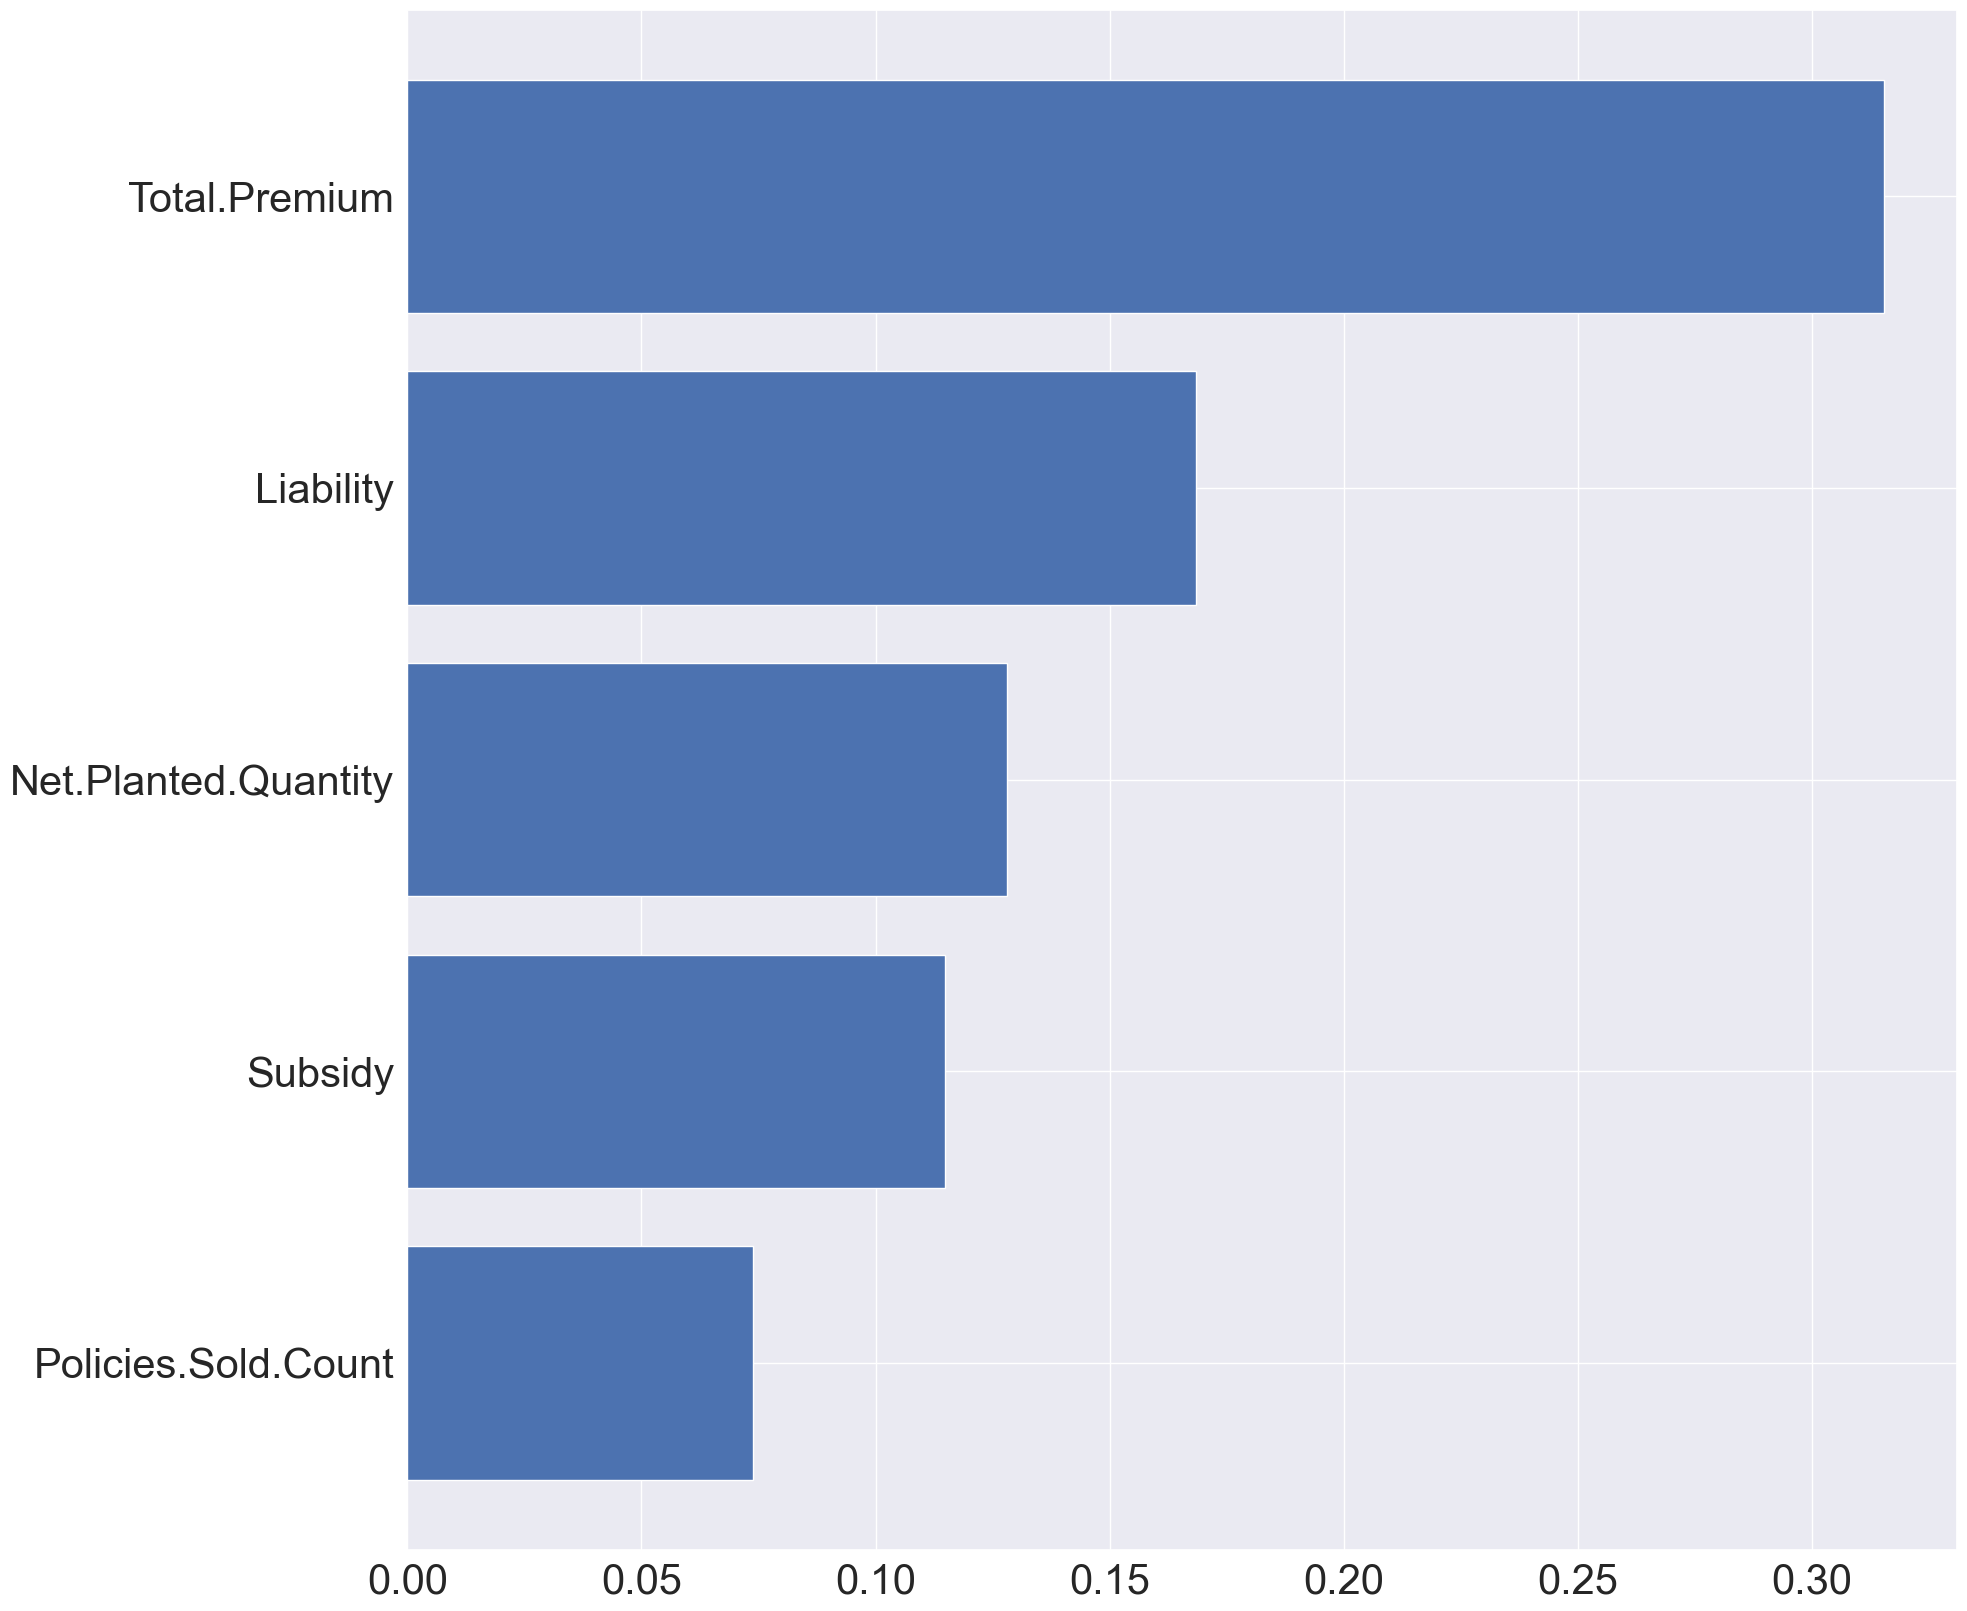

In [32]:
plt.barh(sorted_feature_names[0:5], sorted_importances[0:5])

plt.gca().invert_yaxis()
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [33]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_5 <= 1038.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 0.0
|   |--- feature_4 >  0.50
|   |   |--- feature_4 <= 10875.50
|   |   |   |--- feature_5 <= 376.50
|   |   |   |   |--- feature_4 <= 2908.50
|   |   |   |   |   |--- feature_5 <= 172.50
|   |   |   |   |   |   |--- feature_4 <= 841.50
|   |   |   |   |   |   |   |--- feature_5 <= 80.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.53
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 41.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 162.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  162.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 25
|   |   |   |   |   |   |   |   |   |--- feature_5 >  41.50
|   |   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 29
|   |   |   |   |   |   |   |   |